# Visualizing Simulation Data
How does the simulation data actually look like? How does the change in mu_a or the change in thickness affect the intensitites at different SDDs, calculated at different depths

In [1]:
import seaborn as sns
from inverse_modelling_tfo.data import generate_data_loaders, normalize_zero_mean, interpolate_exp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Load Data
# data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/test_data.pkl')
data = pd.read_pickle(r'/home/rraiyan/personal_projects/tfo_inverse_modelling/data/intensity/intensity_summed_sim_data_equidistance_detector.pkl')
print(len(data))    # Length sanity check
# total_photons = 1e8   # Older sims
total_photons = 1e9 # For intensity_summed_sim_data_equidistance_detector.pkl
data['Intensity'] /= total_photons

950000


In [2]:
# Normalize intensity by detector count
sdd = data['SDD'].to_numpy()[:20]
detector_count = [11, 16, 22, 27, 32, 38, 43, 48, 53, 59, 64, 69, 75, 80, 85, 90, 96, 101, 106, 111]
# detector_count = [20] * 20
sdd_to_detector_count_map = {dist: count for dist, count in zip(sdd, detector_count)}
data['Intensity'] /= data['SDD'].map(sdd_to_detector_count_map)
data.head()

,SDD,Intensity,Wave Int,Uterus Thickness,Maternal Wall Thickness,Maternal Mu_a,Fetal Mu_a
0,10,0.002278,2.0,5.0,26.0,0.005,0.05
1,14,0.000463,2.0,5.0,26.0,0.005,0.05
2,19,0.000111,2.0,5.0,26.0,0.005,0.05
3,23,0.000037,2.0,5.0,26.0,0.005,0.05
4,28,0.000014,2.0,5.0,26.0,0.005,0.05


In [3]:
data["Wave Int"].unique()

array([2.])

In [4]:
# Set pyplot defaults
plt.rcParams['savefig.dpi'] = 600
plt.rcParams['font.size'] = 12

In [5]:
parameter_names = ['Maternal Mu_a', 'Fetal Mu_a', 'Maternal Wall Thickness', 'Uterus Thickness']
for parameter in parameter_names:
    print(parameter, ' unique values ', pd.unique(data[parameter]))

Maternal Mu_a  unique values  [0.005  0.0051 0.0052 0.0053 0.0054 0.0055 0.0056 0.0057 0.0058 0.0059
 0.006  0.0061 0.0062 0.0063 0.0064 0.0065 0.0066 0.0067 0.0068 0.0069
 0.007  0.0071 0.0072 0.0073 0.0074 0.0075 0.0076 0.0077 0.0078 0.0079
 0.008  0.0081 0.0082 0.0083 0.0084 0.0085 0.0086 0.0087 0.0088 0.0089
 0.009  0.0091 0.0092 0.0093 0.0094 0.0095 0.0096 0.0097 0.0098 0.0099]
Fetal Mu_a  unique values  [0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059 0.06  0.061
 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071 0.072 0.073
 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083 0.084 0.085
 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095 0.096 0.097
 0.098 0.099]
Maternal Wall Thickness  unique values  [26. 30. 36. 20. 10. 14.  2. 24. 12.  8.  4. 18. 34.  6. 32. 28. 16. 38.
 22.]
Uterus Thickness  unique values  [5.]


## Changing Uterus Thickness

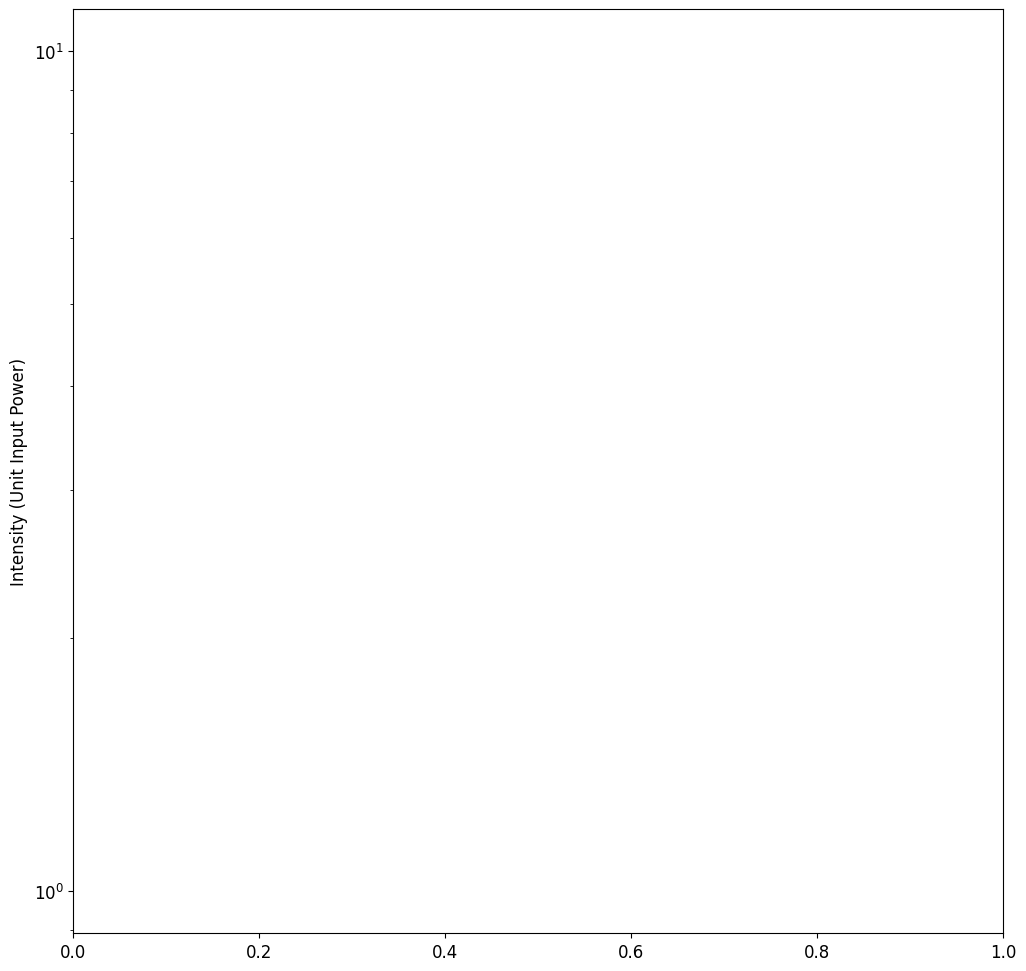

In [6]:
selected_data = data[(data['Wave Int'] == 1.0) & (data['Maternal Wall Thickness'] == 8.0) & (data['Maternal Mu_a'] == 0.005) & (data['Fetal Mu_a'] == 0.05)]
plt.figure(figsize=(12, 12))
sns.lineplot(data=selected_data, x='SDD', y='Intensity', hue='Uterus Thickness', marker='o')
plt.ylabel('Intensity (Unit Input Power)')
plt.yscale('log')

In [7]:
column_name = 'Interpolated Intensity'
grouped_data = selected_data.groupby('Uterus Thickness')
confusion_matrix = []
group_names = []
for i, (name1, group1) in enumerate(grouped_data):
    group_names.append(round(name1, 0))
    row = []
    for j, (name2, group2) in enumerate(grouped_data):
        mse = np.mean(np.square(np.log(group2[column_name].to_numpy()) - np.log(group1[column_name].to_numpy())))
        row.append(mse)
    confusion_matrix.append(row)

confusion_df = pd.DataFrame(confusion_matrix, index=group_names, columns=group_names)
plt.figure(figsize=(10, 10))
sns.heatmap(data=confusion_df, annot=True)

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 1000x1000 with 0 Axes>

# Changing Maternal Wall Thickness

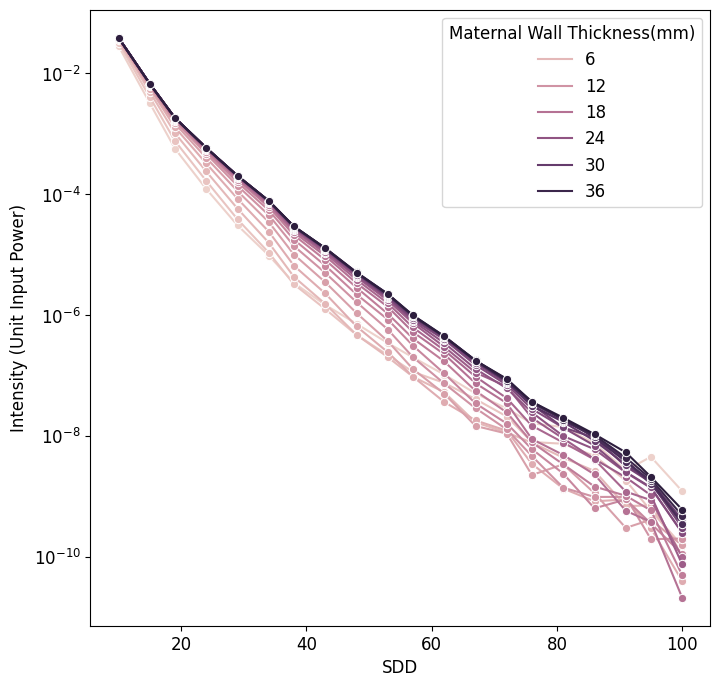

In [ ]:
selected_data = data[(data['Wave Int'] == 1.0) & (data['Uterus Thickness'] == 6.0) & (data['Maternal Mu_a'] == 0.005) & (data['Fetal Mu_a'] == 0.05)]
plt.figure(figsize=(8, 8))
sns.lineplot(data=selected_data, x='SDD', y='Intensity', hue='Maternal Wall Thickness', marker='o')
plt.ylabel('Intensity (Unit Input Power)')
plt.yscale('log')
plt.legend(title='Maternal Wall Thickness(mm)')

<AxesSubplot:>

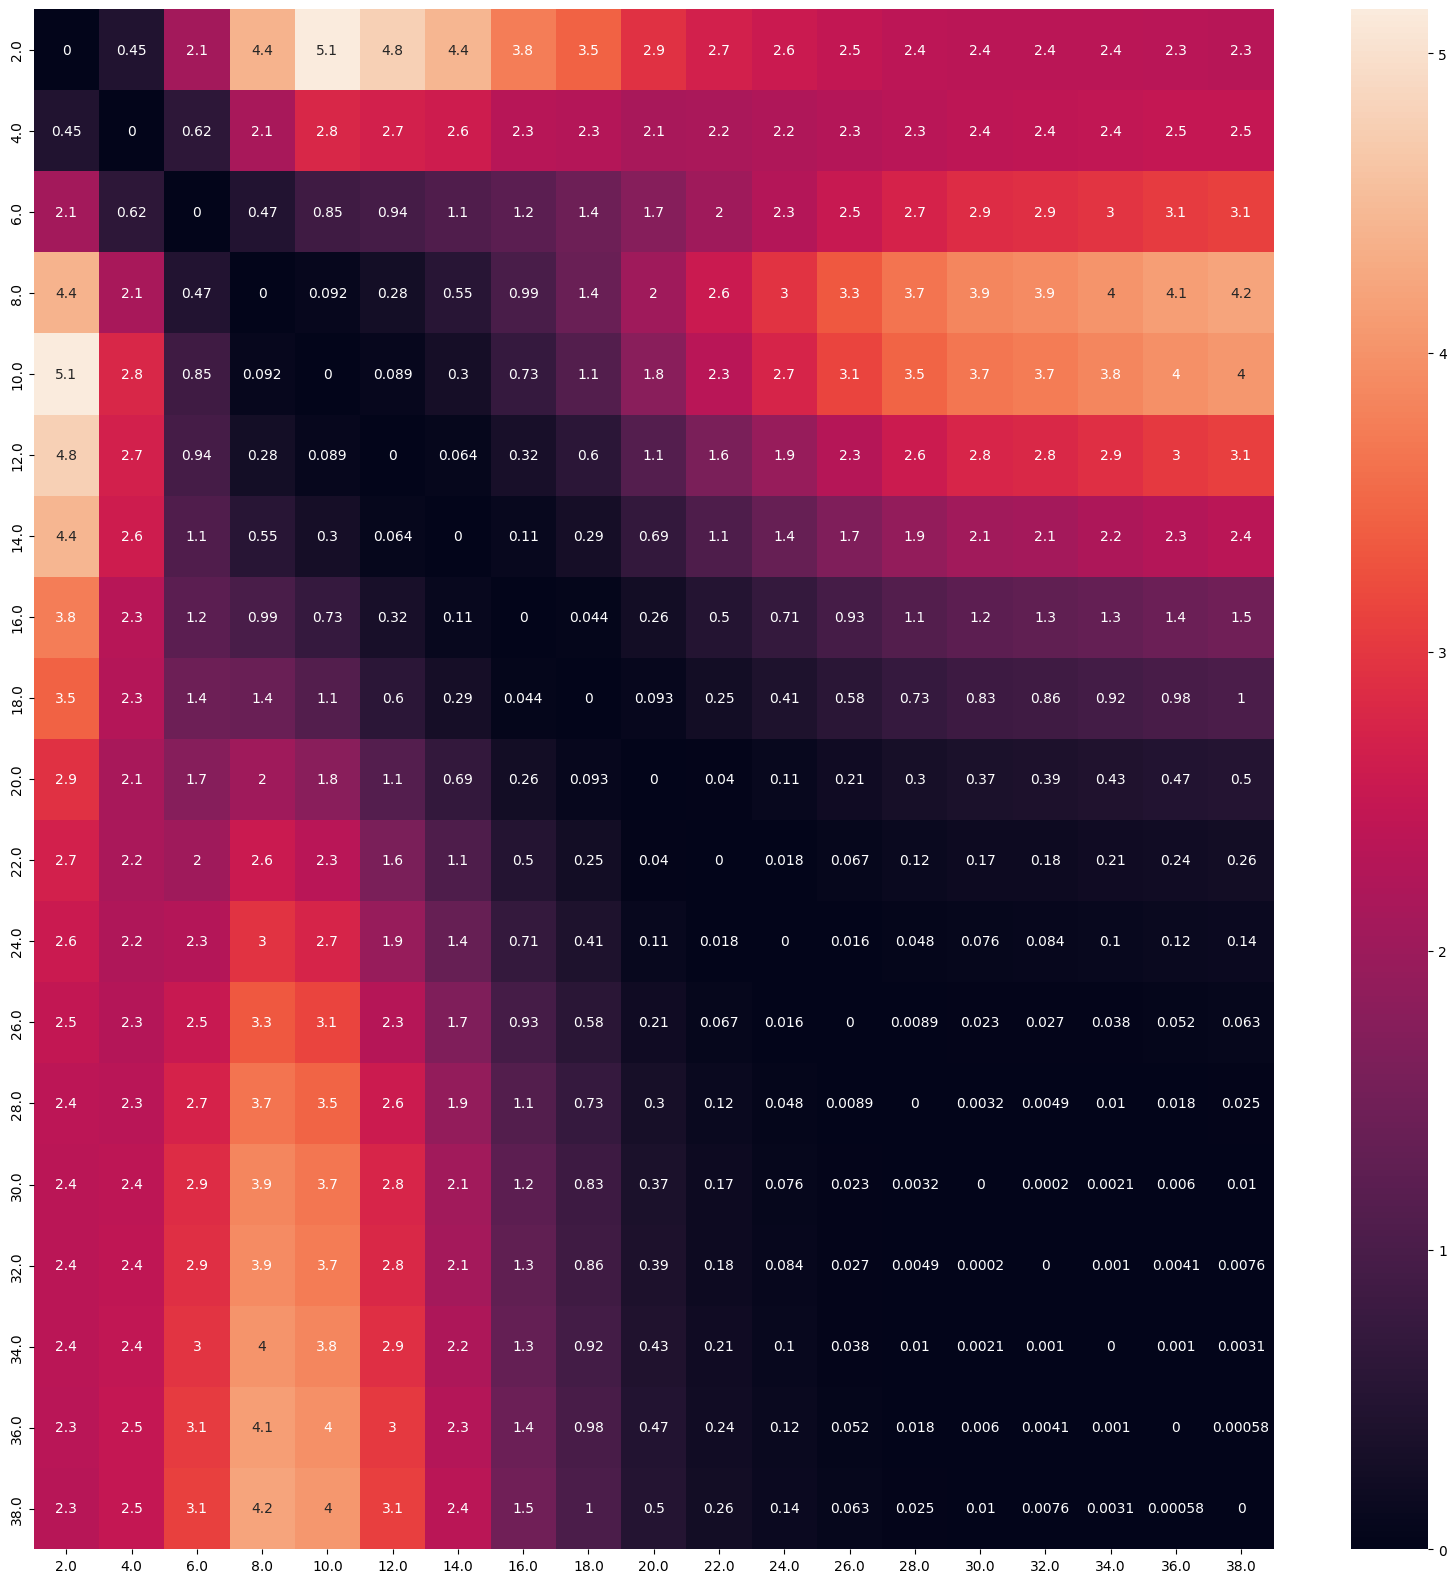

In [ ]:
column_name = 'Interpolated Intensity'
grouped_data = selected_data.groupby('Maternal Wall Thickness')
confusion_matrix = []
group_names = []
for i, (name1, group1) in enumerate(grouped_data):
    group_names.append(round(name1, 0))
    row = []
    for j, (name2, group2) in enumerate(grouped_data):
        mse = np.mean(np.square(np.log(group2[column_name].to_numpy()) - np.log(group1[column_name].to_numpy())))
        row.append(mse)
    confusion_matrix.append(row)

confusion_df = pd.DataFrame(confusion_matrix, index=group_names, columns=group_names)
plt.figure(figsize=(20, 20))
sns.heatmap(data=confusion_df, annot=True)

# Chaning Maternal Mu_a

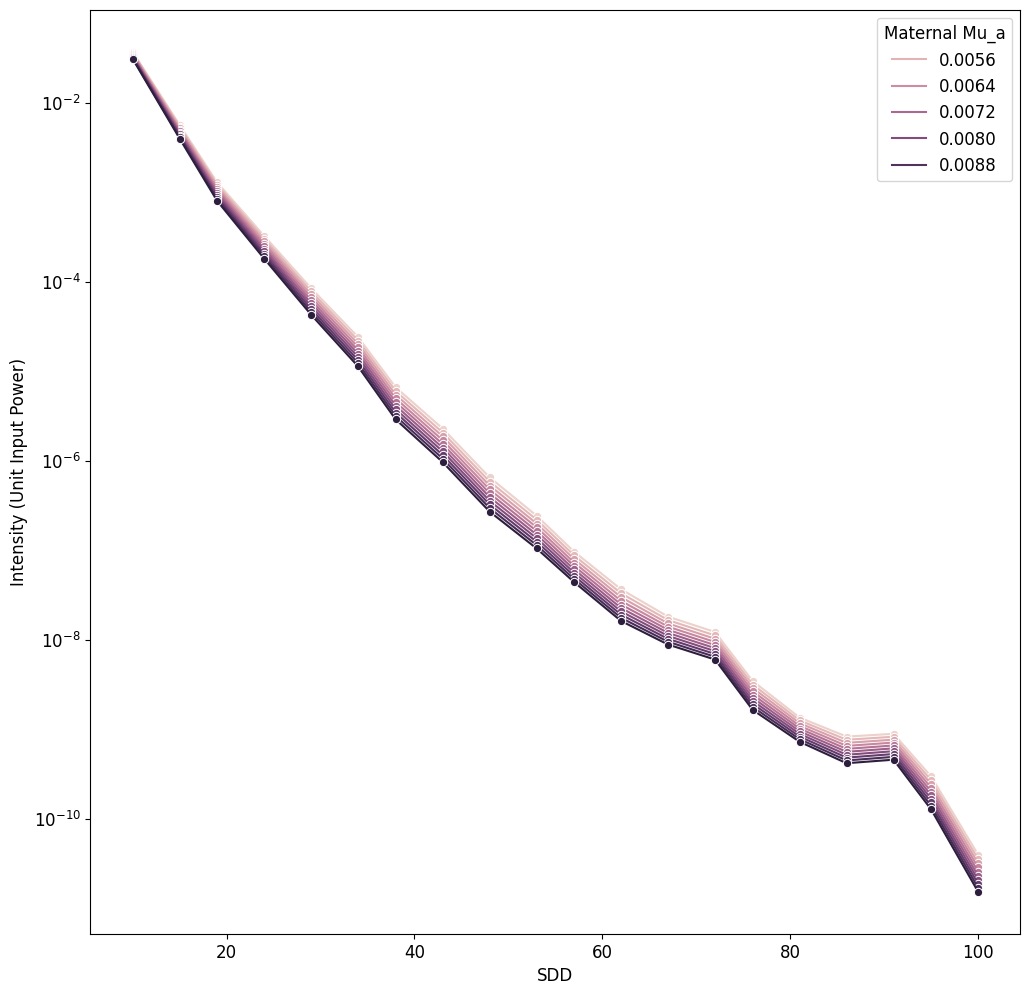

In [ ]:
selected_data = data[(data['Wave Int'] == 1.0) & (data['Uterus Thickness'] == 6.0) & (data['Maternal Wall Thickness'] == 8.0) & (data['Fetal Mu_a'] == 0.05)]
plt.figure(figsize=(12, 12))
sns.lineplot(data=selected_data, x='SDD', y='Intensity', hue='Maternal Mu_a', marker='o')
plt.ylabel('Intensity (Unit Input Power)')
plt.yscale('log')

<AxesSubplot:>

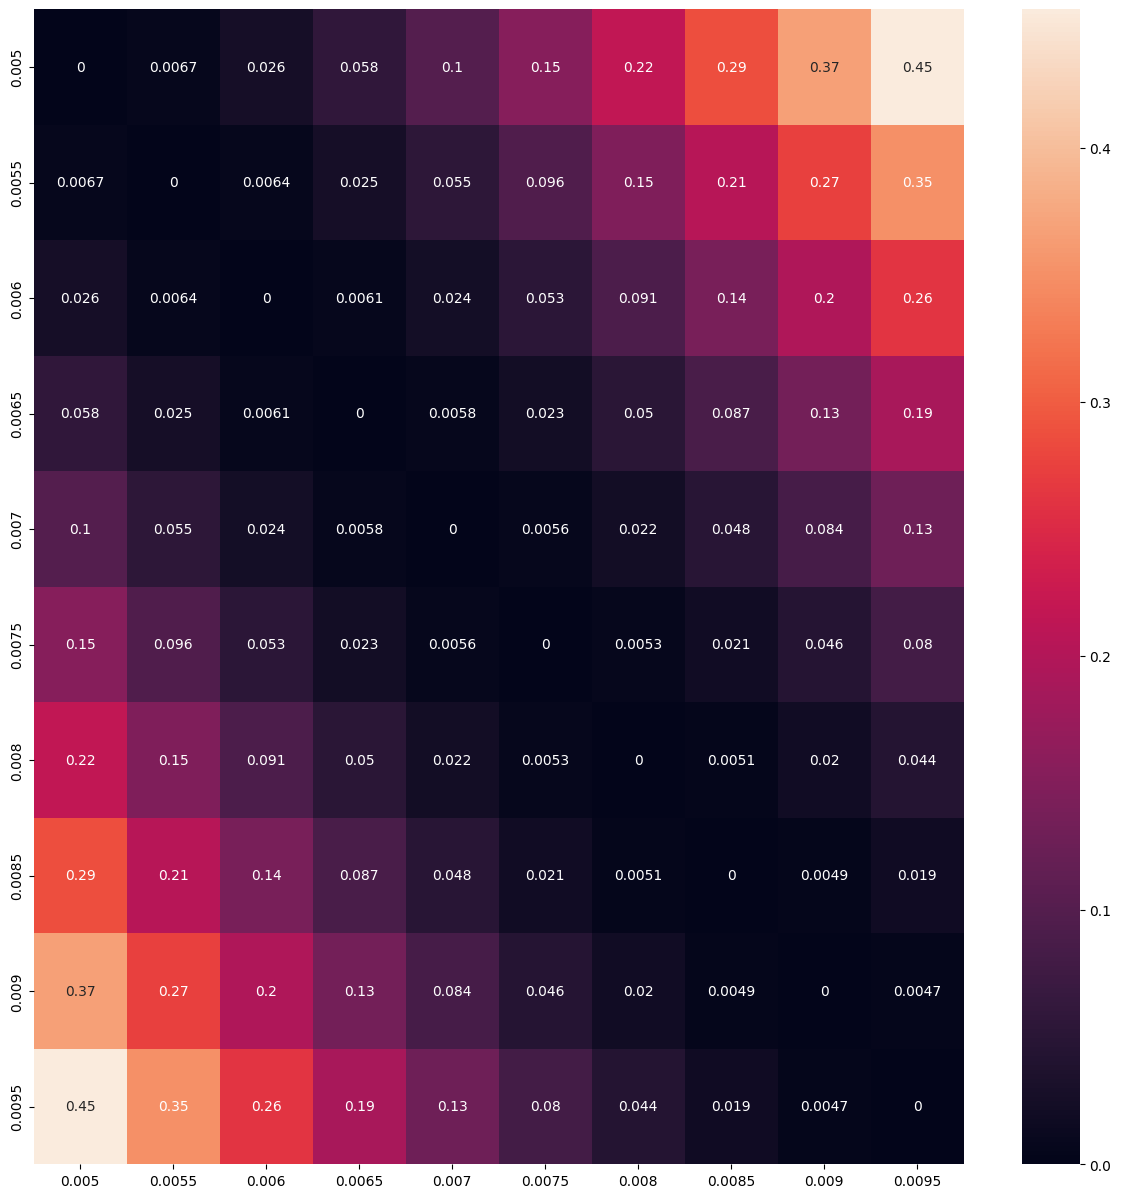

In [ ]:
column_name = 'Interpolated Intensity'
grouped_data = selected_data.groupby('Maternal Mu_a')
confusion_matrix = []
group_names = []
for i, (name1, group1) in enumerate(grouped_data):
    group_names.append(round(name1, 4))
    row = []
    for j, (name2, group2) in enumerate(grouped_data):
        mse = np.mean(np.square(np.log(group2[column_name].to_numpy()) - np.log(group1[column_name].to_numpy())))
        row.append(mse)
    confusion_matrix.append(row)

confusion_df = pd.DataFrame(confusion_matrix, index=group_names, columns=group_names)
plt.figure(figsize=(15, 15))
sns.heatmap(data=confusion_df, annot=True)

# Chaning Fetal Mu_a

(<matplotlib.patches.Rectangle at 0x7fdb68772e50>,
 (<matplotlib.patches.ConnectionPatch at 0x7fdb6872fcd0>,
  <matplotlib.patches.ConnectionPatch at 0x7fdb68727c40>))

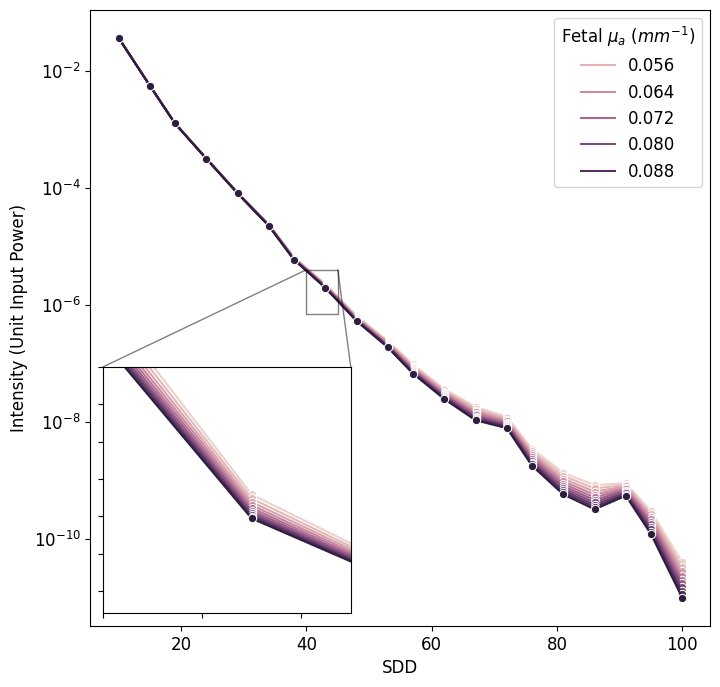

In [ ]:
selected_data = data[(data['Wave Int'] == 1.0) & (data['Uterus Thickness'] == 6.0) & (data['Maternal Wall Thickness'] == 8.0) & (data['Maternal Mu_a'] == 0.005)]
plt.figure(figsize=(8, 8))
sns.lineplot(data=selected_data, x='SDD', y='Intensity', hue='Fetal Mu_a', marker='o')
plt.ylabel('Intensity (Unit Input Power)')
plt.yscale('log')
plt.legend(title=r'Fetal $\mu_a$ ($mm^{-1}$)')

# inset axes....
ax = plt.gca()
axins = ax.inset_axes([0.02, 0.02, 0.4, 0.4])
sns.lineplot(data=selected_data, x='SDD', y='Intensity', hue='Fetal Mu_a', marker='o', ax=axins, legend=False)
# subregion of the original image
x1, x2, y1, y2 = 40, 45, 7e-7, 4e-6
axins.set_xlim(x1, x2)
axins.set_ylim(y1, y2)
axins.set_xticklabels([])
axins.set_yticklabels([])
axins.set_ylabel('')
axins.set_xlabel('')

ax.indicate_inset_zoom(axins, edgecolor="black")

<AxesSubplot:>

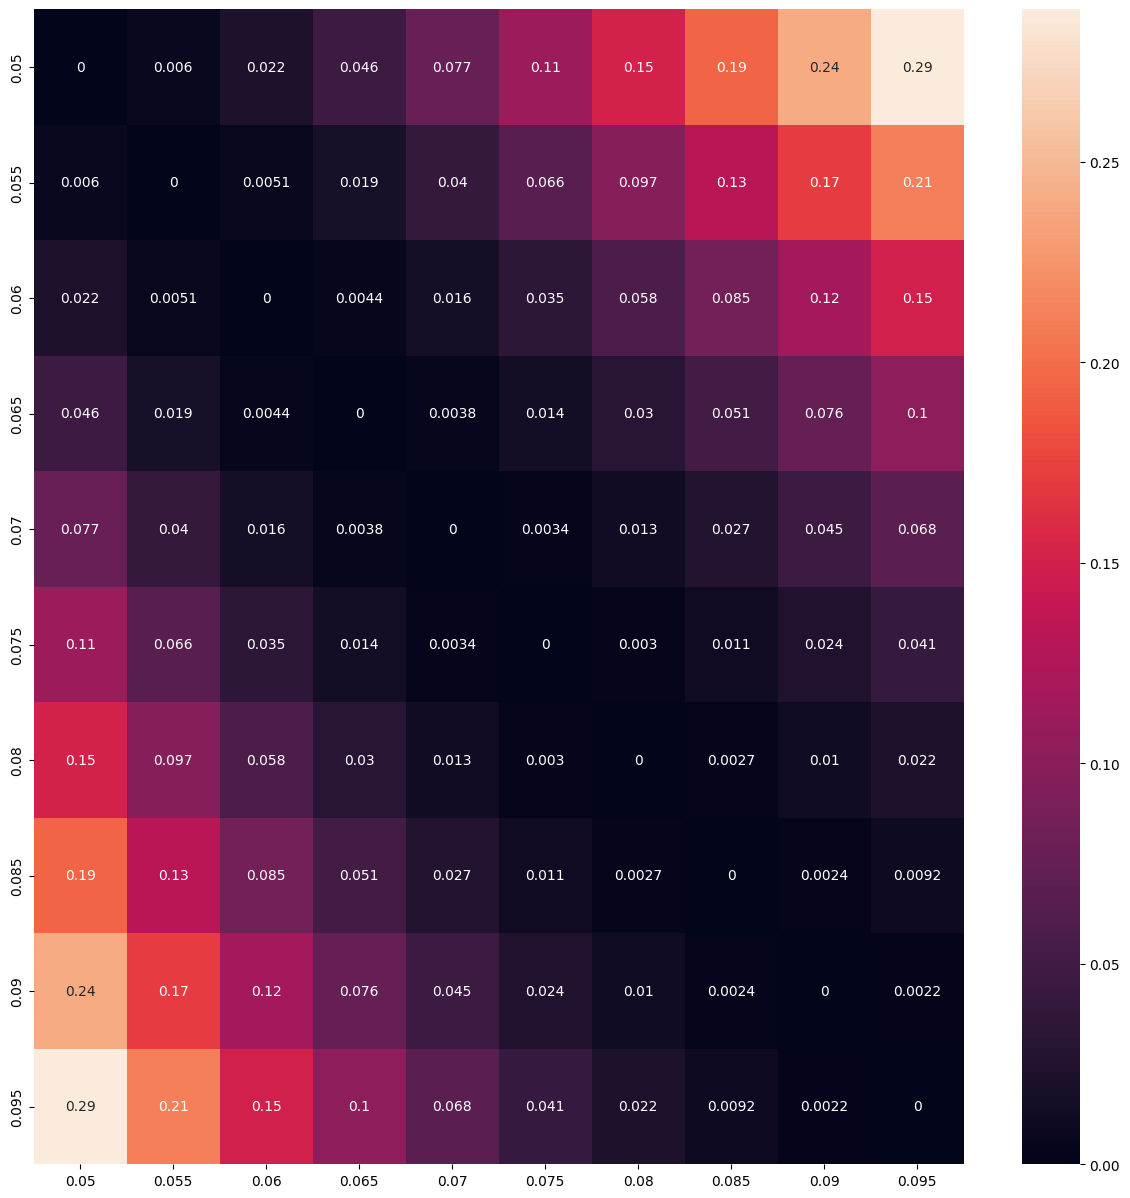

In [ ]:
column_name = 'Interpolated Intensity'
grouped_data = selected_data.groupby('Fetal Mu_a')
confusion_matrix = []
group_names = []
for i, (name1, group1) in enumerate(grouped_data):
    group_names.append(round(name1, 3))
    row = []
    for j, (name2, group2) in enumerate(grouped_data):
        mse = np.mean(np.square(np.log(group2[column_name].to_numpy()) - np.log(group1[column_name].to_numpy())))
        row.append(mse)
    confusion_matrix.append(row)

confusion_df = pd.DataFrame(confusion_matrix, index=group_names, columns=group_names)
plt.figure(figsize=(15, 15))
sns.heatmap(data=confusion_df, annot=True)